In [1]:
from google.colab import drive
drive.mount('/content/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/data


In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

  Found existing installation: opencv-python 3.4.3.18
    Uninstalling opencv-python-3.4.3.18:
      Successfully uninstalled opencv-python-3.4.3.18


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
from matplotlib import pyplot as plt
import time
from tqdm import tqdm

In [3]:
def rename_files(direc, obj):
    i = 1
    for filename in os.listdir(direc):
        os.rename(direc+"/"+filename, direc+"/"+ obj + str(i)+".jpg")
        i = i + 1
rename_files('data/My Drive/lab1_cvpr/eiffel_tower', "my_cat")
rename_files('data/My Drive/lab1_cvpr/eiffel_tower', "eiffel_tower")
rename_files('data/My Drive/lab1_cvpr/no_my_cat', "no_my_cat")
rename_files('data/My Drive/lab1_cvpr/no_eiffel_tower', "no_eiffel_tower")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'data/My Drive/lab1_cvpr/eiffel_tower'

In [0]:
def load_data(DATADIR):

  CATEGORIES = ["my_cat", "eiffel_tower","no_my_cat","no_eiffel_tower"]
  #IMG_SIZE = 224
  training_data = []

  def create_training_data():
      for category in CATEGORIES:  
          path = os.path.join(DATADIR,category)  
          class_num = CATEGORIES.index(category) 
          for img in tqdm(os.listdir(path)): 
              try:
                  img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE )
                  #new_array = cv2.resize(img_array,(IMG_SIZE , IMG_SIZE)) 
                  training_data.append([img_array, class_num]) 
              except Exception as e:  
                  print(img)
              

  create_training_data()
  return training_data

In [0]:
def sift(picture,etalon,pref, f):
  detector = cv2.KAZE_create()
  results = []
  for image in picture[:10]:
    (kps, desc) = detector.detectAndCompute(image, None)
    results.append((kps,desc,image))
  (kps_good, descs_good) = detector.detectAndCompute(etalon, None)

  i = 0
  for (kps, desc, image) in results:
    f.write(pref+" Image "+str(i)+"\n")
    f.write("keypoints: {}, descriptors: {}".format(len(kps), desc.shape)+"\n")
    print("keypoints: {}, descriptors: {}".format(len(kps), desc.shape))
    start_time = time.time()

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params,search_params)

    matches = flann.knnMatch(desc,descs_good,k=2)


    good = []
    for m, n in matches:
      if m.distance < 0.9 * n.distance:
        good.append([m])

    img3 = cv2.drawMatchesKnn(image, kps, etalon, kps_good, good[:10], None, flags=2)
    cv2.imwrite("/content/results/"+pref+"res"+str(i)+".jpg", img3)
    f.write("Time: {}\n".format(time.time()-start_time))
    i = i + 1

In [19]:
def kaze(picture,etalon,pref, f):
  detector = cv2.KAZE_create()
  results = []
  for image in picture[:5]:
    (kps, desc) = detector.detectAndCompute(image, None)
    results.append((kps,desc,image))
  (kps_good, descs_good) = detector.detectAndCompute(etalon, None)

  i = 0
  for (kps, desc, image) in results:
    f.write(pref+" Image "+str(i)+"\n")
    f.write("keypoints: {}, descriptors: {}".format(len(kps), desc.shape)+"\n")
    print("keypoints: {}, descriptors: {}".format(len(kps), desc.shape))
    start_time = time.time()

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params,search_params)

    matches = flann.knnMatch(desc,descs_good,k=2)

    # Need to draw only good matches, so create a mask
    #matchesMask = [[0,0] for i in range(len(matches))]

    # ratio test as per Lowe's paper
    #for i,(m,n) in enumerate(matches):
    #    if m.distance < 0.7*n.distance:
    #        matchesMask[i]=[1,0]

    #draw_params = dict(matchColor = (0,255,0),
    #                   singlePointColor = (255,0,0),
    #                   matchesMask = matchesMask,
    #                   flags = 2)
    #img3 = cv2.drawMatchesKnn(image, kps, picture[num], kps_good, matchesMask[:10], None,**draw_params)

    #img3 = cv2.drawMatchesKnn(image, kps, picture[num], kps_good, matchesMask[:10], None, flags=2)
    
    #bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
    #matches = bf.knnMatch(desc,descs_good,k=2) 

    good = []
    for m, n in matches:
      if m.distance < 0.9 * n.distance:
        good.append([m])

    img3 = cv2.drawMatchesKnn(image, kps, etalon, kps_good, good[:10], None, flags=2)
    cv2.imwrite("C:\\Users\\Vitaliy\\results_lab1_cvpr\\"+pref+"res"+str(i)+".jpg", img3)
    f.write("Time: {}\n".format(time.time()-start_time))
    i = i + 1

In [5]:
def load_data_1(directory):
    images = []
    for file in os.listdir(directory):
        if file.endswith(".jpg"):
            images.append(cv2.imread(os.path.join(directory,file),cv2.IMREAD_GRAYSCALE))
    return images

In [8]:
my_cat = load_data_1("C:\\Users\\Vitaliy\\Downloads\\lab1_cvpr-20181105T211132Z-001\\lab1_cvpr\\my_cat")
no_my_cat = load_data_1("C:\\Users\\Vitaliy\\Downloads\\lab1_cvpr-20181105T211132Z-001\\lab1_cvpr\\no_my_cat")
eiffel_tower = load_data_1("C:\\Users\\Vitaliy\\Downloads\\lab1_cvpr-20181105T211132Z-001\\lab1_cvpr\\eiffel_tower")
no_eiffel_tower = load_data_1("C:\\Users\\Vitaliy\\Downloads\\lab1_cvpr-20181105T211132Z-001\\lab1_cvpr\\no_eiffel_tower")


In [20]:
f = open("results.txt", "w")
f.write("Results:\n")
f.close()
f = open("results.txt", "a")
kaze(my_cat,my_cat[2],"good",f)
#kaze(no_my_cat,my_cat[2],"good",f)
#kaze(eiffel_tower,eiffel_tower[2],"good",f)
#kaze(no_eiffel_tower,eiffel_tower[2],"good",f)

keypoints: 755, descriptors: (755, 64)
keypoints: 444, descriptors: (444, 64)
keypoints: 13, descriptors: (13, 64)
keypoints: 75, descriptors: (75, 64)
keypoints: 652, descriptors: (652, 64)


In [0]:
def main():
  #load data
  #datadir = 'data/My Drive/lab1_cvpr'
  #data = load_data("data/My Drive/lab1_cvpr")
  
  X = []
  y = []

  #for features,label in data:
  #    X.append(features)
  #    y.append(label)

  #pickle_out = open("X.pickle","wb")
  #pickle.dump(X, pickle_out)
  #pickle_out.close()

  #pickle_out = open("y.pickle","wb")
  #pickle.dump(y, pickle_out)
  #pickle_out.close()
  pickle_in = open("X.pickle","rb") 
  X = pickle.load(pickle_in)
  pickle_in = open("y.pickle","rb") 
  y = pickle.load(pickle_in)
  X_arr = np.array(X)
  y_arr = np.array(y)
  y_arr = y_arr.reshape((len(y_arr),1))
  my_cat=[]
  no_my_cat = []
  eiffel_tower=[]
  no_eiffel_tower=[]
  for i in range(len(X)) :
    
    #print(item)
    #print("######")
    #print(X.index(item))
    if y[i]==0 :
      my_cat.append(X[i])
    elif y[i]==1 :
      eiffel_tower.append(i)
    elif y[i]==2 :
      no_my_cat.append(i)
    elif y[i]==3 :
      no_eiffel_tower.append(i)
  plt.imshow(my_cat[0], interpolation='nearest')
  plt.show()
  plt.imshow(no_my_cat[0], interpolation='nearest')
  plt.show()
  plt.imshow(eiffel_tower[0], interpolation='nearest')
  plt.show()
  plt.imshow(no_eiffel_tower[0], interpolation='nearest')
  plt.show()

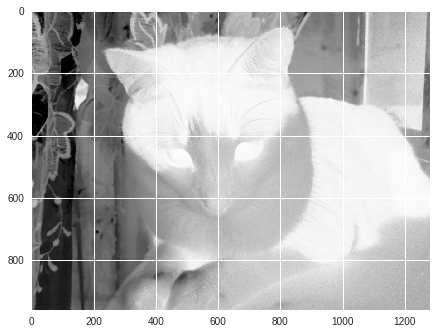

TypeError: ignored

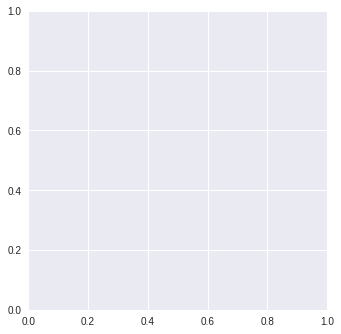

In [40]:
main()

NameError: ignored